RHJvcGRvd24oZGVzY3JpcHRpb249dSdDb3VudHk6Jywgb3B0aW9ucz0oJ0FsYmFueSAnLCAnQmlnIEhvcm4gJywgJ0NhbXBiZWxsICcsICdDYXJib24gJywgJ0NvbnZlcnNlICcsICdDcm9vayDigKY=


IntRangeSlider(value=(2013, 2015), max=2017, min=2012)

county changed to:Hot Springs --Hot Springs 


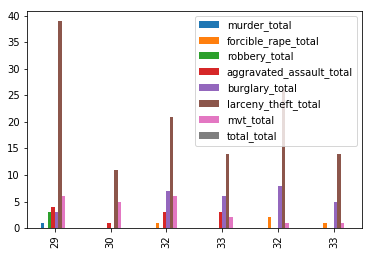

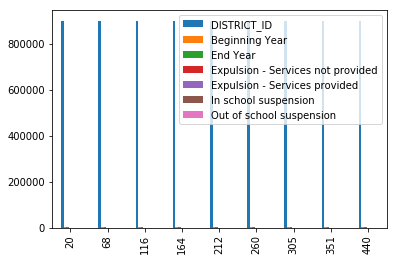

In [7]:
from ipywidgets import widgets
from ipywidgets import interactive
from IPython.display import display, HTML
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import os, sys
import subprocess
import base64 #for createdownloadlink
import data_functions as dfunct

##Get Data Objects
overview=dfunct.getOverview()
dfs = dfunct.getDFS()
school = dfunct.getSchool()
school['County']=school['DISTRICT_NAME'].str.split('#').str[0]
index_crimes = dfunct.getIndexCrimes()
juvenile_arrests = dfunct.getORIData()
##End Data Objects

#graph objects
index_graph = ''
education_graph = ''

def graph_index_crimes(begin,end,county):
    #index_crimes['2016'].plot(type='bar')
    totals_fields = ['murder_total','forcible_rape_total','robbery_total','aggravated_assault_total','burglary_total','larceny_theft_total','mvt_total','total_total']
    #index_graph.close()
    index_graph = index_crimes[totals_fields].loc[index_crimes['county'].str.contains(county.upper())].plot(kind='bar')
    
def graph_education(county):
    #education_graph = school.loc[school['County'].str.contains(county.upper())].plot(kind='bar')
    school.loc[school['County'].str.contains(county)].plot(kind='bar')
    
def county_changed(change):
    plt.close('all')
    print('county changed to:'+str(change['new'])+'--'+str(county_drop.value))
    #print('year is'+str(year_slide.value[0]))
    graph_index_crimes(year_slide.value[0],year_slide.value[1],county_drop.value)
    graph_education(county_drop.value)
    #print(school.loc[change['new'] in school['DISTRICT_NAME']])
    #countyDF = school[school['DISTRICT_NAME'].str.match(change['new'])]
    #noServices = countyDF['Expulsion - Services not provided'].sum()
    #services = countyDF['Expulsion - Services provided'].sum()
    #countyDF.plot(x='Beginning Year',y='Out of school suspension')

def year_changed(change):
    plt.close('all')
    print('changed year'+str(change['new']))
    graph_index_crimes(year_slide.value[0],year_slide.value[1],county_drop.value)
    graph_education(county_drop.value)
    
def plot_DCI_Index(change):
    plt.figure()
    #index_crimes['2016'].plot(type='bar')
    totals_fields = ['murder_total','forcible_rape_total','robbery_total','aggravated_assault_total','burglary_total','larceny_theft_total','mvt_total','total_total']
    index_crimes[totals_fields].loc[index_crimes['county']=='Albany County Totals'].plot(kind='bar')

##Widgets
county_drop = widgets.Dropdown(
    options=school.County.unique().tolist(),
    description='County:',
    disabled=False,
)

year_slide = widgets.IntRangeSlider(min=2012,max=2017,step=1)

county_drop.observe(county_changed, names='value')
year_slide.observe(year_changed,names='value')

display(county_drop)
display(year_slide)
##End Widgets



